In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# Assign X (data) and y (target)
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(8744, 40) (8744,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


# Pre-processing

Scale the data using the MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_scaler
# data = [[X_train,y_train]]
# scaler = MinMaxScaler()
# print(scaler.fit(data))

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Support Vector Machine

In [29]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=1)
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8479719426654467
Testing Data Score: 0.8462946020128088


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [31]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [32]:
grid.estimator.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [33]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.8399634202103338, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8361556064073227, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.8399634202103338, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.8361556064073227, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8399634202103338, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8508691674290942, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8361556064073227, total=   0.4s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   34.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8810612991765783


In [35]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [36]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.84      0.69      0.76       528
FALSE POSITIVE       0.75      0.85      0.80       568
     CANDIDATE       0.98      1.00      0.99      1090

     micro avg       0.89      0.89      0.89      2186
     macro avg       0.86      0.85      0.85      2186
  weighted avg       0.89      0.89      0.88      2186



In [37]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
7217,FALSE POSITIVE,FALSE POSITIVE
873,CONFIRMED,CANDIDATE
189,CONFIRMED,CONFIRMED
6744,CANDIDATE,CANDIDATE
9220,CONFIRMED,CANDIDATE
2554,FALSE POSITIVE,FALSE POSITIVE
8706,FALSE POSITIVE,FALSE POSITIVE
2734,FALSE POSITIVE,FALSE POSITIVE
5685,FALSE POSITIVE,FALSE POSITIVE
8878,FALSE POSITIVE,FALSE POSITIVE


# Model 2



In [53]:
model2 = SVC(kernel='rbf', random_state=1)
model2.fit(X_train_scaled, y_train)

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8039036291552303
Testing Data Score: 0.803751143641354


In [55]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [56]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.4983996342021033, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.49817017383348583, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.4983981693363844, total=   1.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.4983996342021033, total=   1.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..... C=1, gamma=0.0005, score=0.49817017383348583, total=   1.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.4983981693363844, total=   1.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.4983996342021033, total=   1.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.49817017383348583, total=   1.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.4983981693363844, total=   1.6s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [57]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 50, 'gamma': 0.005}
0.8315035071668192


In [58]:
# Make predictions with the hypertuned model
predictions = grid2.predict(X_test_scaled)

In [59]:
# Calculate classification report

print(classification_report(y_test, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.75      0.55      0.63       528
FALSE POSITIVE       0.66      0.80      0.73       568
     CANDIDATE       0.98      1.00      0.99      1090

     micro avg       0.84      0.84      0.84      2186
     macro avg       0.80      0.78      0.78      2186
  weighted avg       0.84      0.84      0.84      2186



# Model 3


In [61]:
model3 = SVC(kernel='poly', random_state=1)
model3.fit(X_train_scaled, y_train)

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.7377249161329674
Testing Data Score: 0.7397072278133577


In [63]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid3 = GridSearchCV(model3, param_grid, verbose=3)

In [64]:
# Train the model with GridSearch
grid3.fit(X_train_scaled, y_train)

/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.4983996342021033, total=   1.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.49817017383348583, total=   1.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.4983981693363844, total=   1.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.4983996342021033, total=   1.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..... C=1, gamma=0.0005, score=0.49817017383348583, total=   1.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.4983981693363844, total=   1.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.4983996342021033, total=   1.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.49817017383348583, total=   1.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.4983981693363844, total=   1.2s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [65]:
print(grid3.best_params_)
print(grid3.best_score_)

{'C': 50, 'gamma': 0.005}
0.7346752058554438


In [66]:
# Make predictions with the hypertuned model
predictions = grid3.predict(X_test_scaled)

In [67]:
# Calculate classification report

print(classification_report(y_test, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.00      0.00      0.00       528
FALSE POSITIVE       0.50      0.97      0.66       568
     CANDIDATE       0.98      0.98      0.98      1090

     micro avg       0.74      0.74      0.74      2186
     macro avg       0.49      0.65      0.55      2186
  weighted avg       0.62      0.74      0.66      2186



/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# model 4


In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.797
score diff: 0.20265324794144557
k: 3, Train/Test Score: 0.896/0.813
score diff: 0.0829521195486429
k: 5, Train/Test Score: 0.873/0.814
score diff: 0.05885940835620618
k: 7, Train/Test Score: 0.864/0.819
score diff: 0.04544068313510219
k: 9, Train/Test Score: 0.859/0.822
score diff: 0.03720646538578842
k: 11, Train/Test Score: 0.852/0.817
score diff: 0.0349191826776456
k: 13, Train/Test Score: 0.848/0.819
score diff: 0.028972247636474546
k: 15, Train/Test Score: 0.844/0.822
score diff: 0.022262885025922552
k: 17, Train/Test Score: 0.844/0.821
score diff: 0.023177798109179637
k: 19, Train/Test Score: 0.843/0.823
score diff: 0.020433058859408382
k: 21, Train/Test Score: 0.840/0.819
score diff: 0.020890515401036924
k: 23, Train/Test Score: 0.839/0.822
score diff: 0.016468435498627643
k: 25, Train/Test Score: 0.836/0.824
score diff: 0.012046355596218361
k: 27, Train/Test Score: 0.836/0.823
score diff: 0.013723696248856387
k: 29, Train/Test Score: 0.834/0.

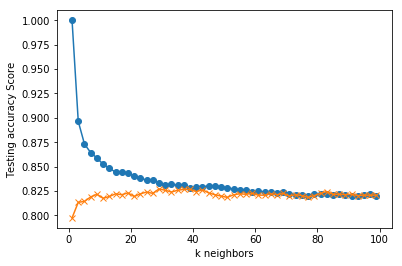

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
score_diff = []
min_score = 1
best_fit = 0
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    score_diff = abs(train_score - test_score)
    if score_diff <= min_score:
        min_score = score_diff
        best_fit = k
       
    
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    print(f"score diff: {score_diff}")
    
print(f"min score: {min_score}, best_fit: {best_fit}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(X_train, y_train)
print('k=95 Test Acc: %.3f' % knn.score(X_test, y_test))

k=95 Test Acc: 0.634


In [14]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.2598353156450137
Testing Data Score: 0.2598353156450137


In [19]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid4 = GridSearchCV(knn, param_grid, verbose=3)

In [23]:
grid4.estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [21]:
# Train the model with GridSearch
grid4.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


/anaconda3/envs/python_data/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter C for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=95, p=2,
           weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

In [20]:
print(grid4.best_params_)
print(grid4.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'